In [1]:
from sklearn.cluster import KMeans
from chengchurch import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def plot_table(axes, df, sub_mat = None, title = 'matrix'):
    axes.set_title(title)
    data = df.values
    axes.axis('off')
    stripe = np.empty(np.array(data).shape, dtype=np.dtype(('U10', 1)) )
    rowColours = []
    colWidths = [0.12 for _ in range(0, stripe.shape[0])]
    for i in range(0,stripe.shape[0]):
        for j in range(0, stripe.shape[1]):

            if i % 2 == 0:
                stripe[i,j] = '0.9'

            else:
                stripe[i,j] = 'w'
    if sub_mat is not None:
        for i in sub_mat[0]:
            for j in sub_mat[1]:
                stripe[i,j] = 'g'

    rowColours = []
    for j in range(0, stripe.shape[0]):
        if j % 2 == 0:    
            rowColours.append('0.9')
        else:
            rowColours.append('1.0')

    print(rowColours)
    stripe
    axes.table(cellText=data,
                          cellColours=stripe,
                          rowColours = rowColours,
                          loc='center',
                          rowLabels=list(df.index),
                          colLabels=list(df.columns),
                          colWidths = colWidths,
                          )

def plot_parallel(ax, df, title = 'Parallel coordinates'):
    

    ax.set_title(title)
    df["index"] = df.index.values
    pd.plotting.parallel_coordinates(
            df, "index", ax=ax,
#             color=('#556270', '#4ECDC4', '#C7F464')
    )
    
    
    

In [17]:
size = (20,10)
mat = np.random.choice([1,0],size)
kmeans = KMeans(n_clusters=2, random_state=0).fit(mat)
kmeansT = KMeans(n_clusters=2, random_state=0).fit(np.transpose(mat))
bi_cc = find_biclusters_singleDeletion(mat, n_of_bicluster=1, msr_threshold=0.1)


rows1 = np.where(kmeans.labels_==0)[0]
rows2 = np.where(kmeans.labels_==1)[0]

cols1 = np.where(kmeansT.labels_==0)[0]
cols2 = np.where(kmeansT.labels_==1)[0]


['0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0']
['0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0']
['0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0', '0.9', '1.0']


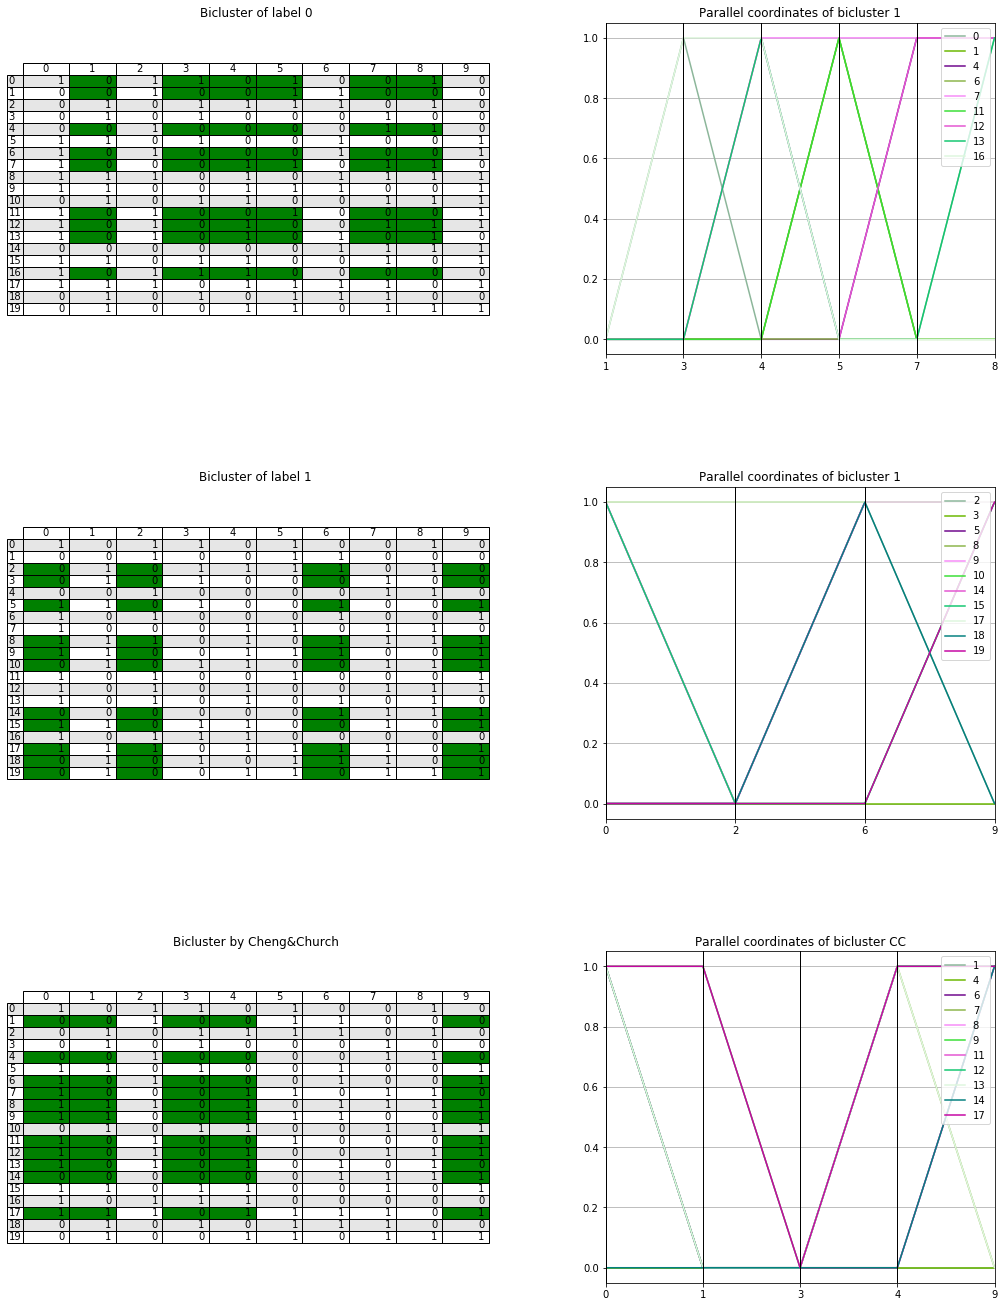

In [18]:
fig_size =[0,0]    
fig, axes = plt.subplots(nrows=3, ncols=2)
fig_size[0] = 6.4 *3
fig_size[1] = 25
plt.rcParams["figure.figsize"] = fig_size
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8,wspace = 0.4, hspace = 0.4)

mat_df = pd.DataFrame(mat)

plot_table(axes[0,0],mat_df,sub_mat=[rows1,cols1],title = f'Bicluster of label 0')
plot_table(axes[1,0],mat_df,sub_mat=[rows2,cols2],title = f'Bicluster of label 1')

plot_table(axes[2,0],mat_df,sub_mat=[bi_cc[0].rows,bi_cc[0].cols],
           title = f'Bicluster by Cheng&Church')


bi1_df = pd.DataFrame(mat[rows1][:,cols1],
                      index=rows1,columns=cols1)

bi2_df = pd.DataFrame(mat[rows2][:,cols2],
                      index=rows2,columns=cols2)

biCC = pd.DataFrame(mat[bi_cc[0].rows][:,bi_cc[0].cols],
                      index=bi_cc[0].rows,columns=bi_cc[0].cols)


plot_parallel(axes[0,1],bi1_df,
                      title='Parallel coordinates of bicluster 1')
plot_parallel(axes[1,1],bi2_df,
                      title='Parallel coordinates of bicluster 1')
plot_parallel(axes[2,1],biCC,
                      title='Parallel coordinates of bicluster CC')

fig.savefig('clusterOnC&R.pdf')